58.798882681564244


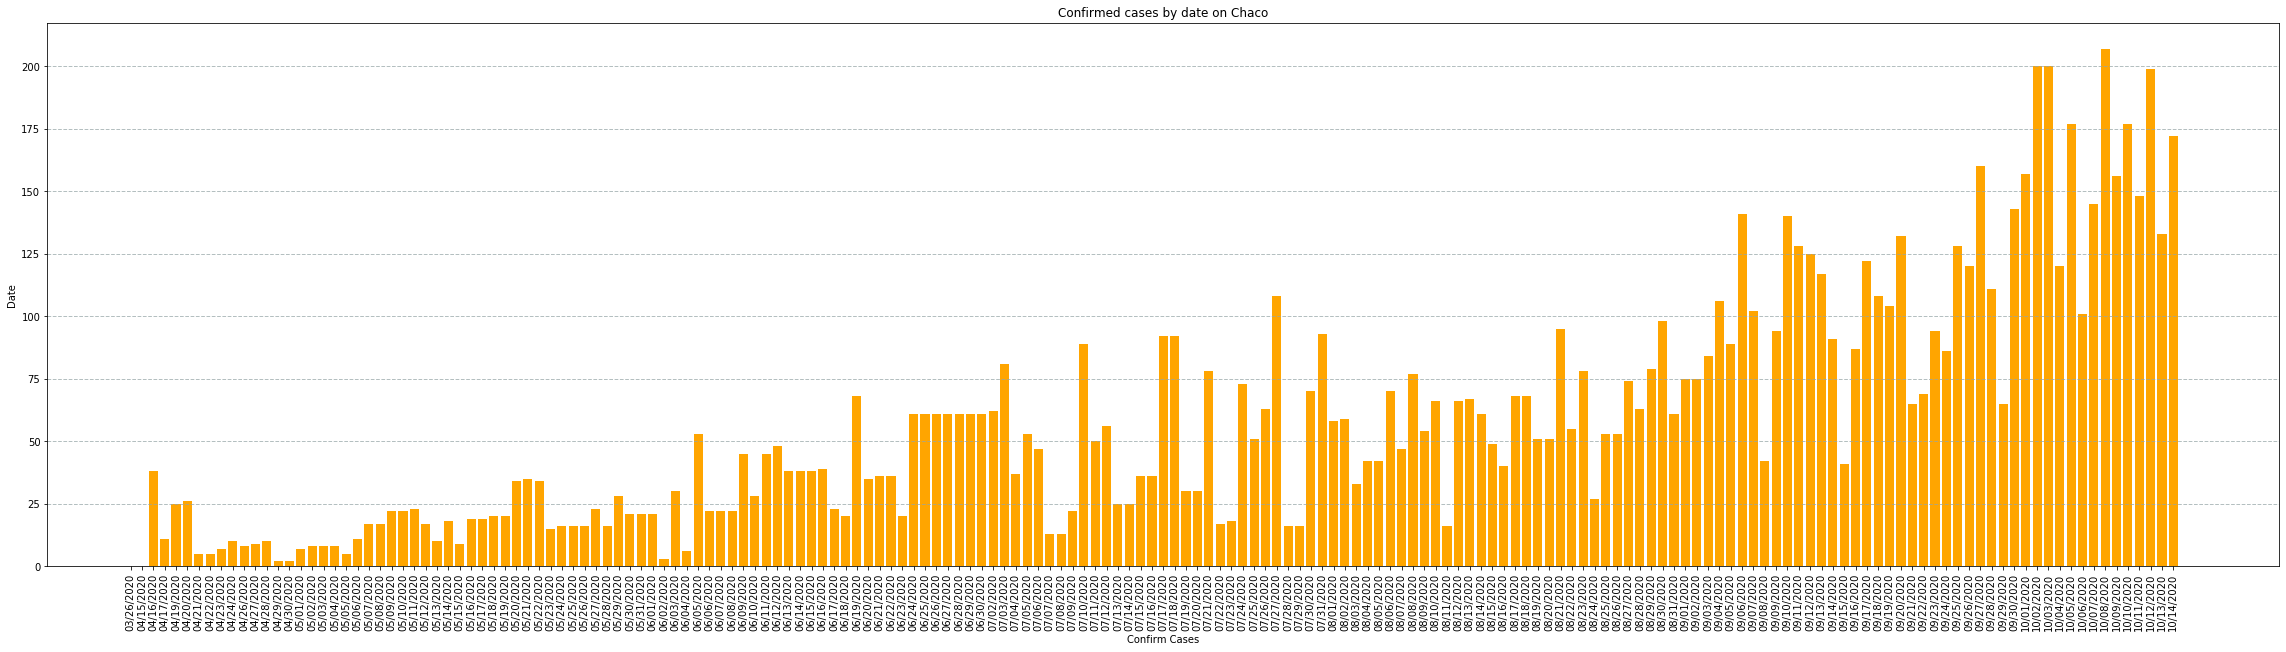

In [133]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

#Store the Argentina data into a pandas' data frame
df_ArgentinaRaw = pd.read_csv('C:/Users/paulo/Documents/Paulo/Covid19_Data/DataFiles/Argentina_raw_data.csv',delimiter=',',header='infer')
#df_ArgentinaRaw.head()

#df_ArgentinaRaw.query('AdminRegion1=="Chaco"')
#print(df_ArgentinaRaw.loc[1000,'ID'])
#print(int(df_ArgentinaRaw.loc[990,'ID'])-int(df_ArgentinaRaw.loc[901,'ID']))
#print(int(df_ArgentinaRaw.loc[901,'ID'])-int(df_ArgentinaRaw.loc[902,'ID']))

#df_ArgentinaRaw.query('AdminRegion1=="Chaco"').isnull().sum()

print(df_ArgentinaRaw.query('AdminRegion1=="Chaco"').ConfirmedChange.mean())

# Create a bar plot of ConfirmedChange values in Chaco by date.
fig, graph  = plt.subplots(figsize=(40, 10))
graph.bar(x = df_ArgentinaRaw.query('AdminRegion1=="Chaco"').Updated, height = df_ArgentinaRaw.query('AdminRegion1=="Chaco"').ConfirmedChange, color = 'orange')

# Customize the chart
plt.title('Confirmed cases by date on Chaco')
plt.xlabel('Confirm Cases')
plt.ylabel('Date')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Display the plot
plt.show()



#df_ArgentinaRaw.query('AdminRegion1=="Chaco"')
#df_ArgentinaRaw.query('AdminRegion1=="Chaco"').ConfirmedChange

In [134]:
df_ArgentinaRaw.head()

,ID,Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,AdminRegion1,AdminRegion2
0,7168137,03/03/2020,1,NaN,0.0,NaN,NaN,NaN,-35.18115,-65.09386,AR,ARG,Argentina,NaN,NaN
1,341367,03/04/2020,1,0.0,0.0,0.0,NaN,NaN,-35.18115,-65.09386,AR,ARG,Argentina,NaN,NaN
2,7168139,03/05/2020,2,1.0,0.0,0.0,NaN,NaN,-35.18115,-65.09386,AR,ARG,Argentina,NaN,NaN
3,7168142,03/06/2020,8,6.0,0.0,0.0,0.0,NaN,-35.18115,-65.09386,AR,ARG,Argentina,NaN,NaN
4,7168144,03/07/2020,9,1.0,1.0,1.0,0.0,0.0,-35.18115,-65.09386,AR,ARG,Argentina,NaN,NaN


In [135]:
df_ArgentinaRaw.Confirmed = df_ArgentinaRaw.Confirmed.fillna(0)
df_ArgentinaRaw.ConfirmedChange = df_ArgentinaRaw.ConfirmedChange.fillna(0)
df_ArgentinaRaw.Deaths = df_ArgentinaRaw.Deaths.fillna(0)
df_ArgentinaRaw.DeathsChange = df_ArgentinaRaw.DeathsChange.fillna(0)
df_ArgentinaRaw.Recovered = df_ArgentinaRaw.Recovered.fillna(0)
df_ArgentinaRaw.RecoveredChange = df_ArgentinaRaw.RecoveredChange.fillna(0)
df_ArgentinaRaw.query('AdminRegion1=="Chaco"')

,ID,Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,AdminRegion1,AdminRegion2
680,1367940,03/26/2020,55,0.0,4.0,0.0,0.0,0.0,-26.38626,-60.76559,AR,ARG,Argentina,Chaco,NaN
841,5310782,04/15/2020,153,0.0,9.0,0.0,0.0,0.0,-26.38626,-60.76559,AR,ARG,Argentina,Chaco,NaN
842,5415904,04/16/2020,191,38.0,9.0,0.0,0.0,0.0,-26.38626,-60.76559,AR,ARG,Argentina,Chaco,NaN
843,5435045,04/17/2020,202,11.0,10.0,1.0,0.0,0.0,-26.38626,-60.76559,AR,ARG,Argentina,Chaco,NaN
844,5453717,04/19/2020,227,25.0,10.0,0.0,0.0,0.0,-26.38626,-60.76559,AR,ARG,Argentina,Chaco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,73438291,10/10/2020,10026,177.0,332.0,11.0,8470.0,50.0,-26.38626,-60.76559,AR,ARG,Argentina,Chaco,NaN
1017,73849434,10/11/2020,10174,148.0,335.0,3.0,8622.0,152.0,-26.38626,-60.76559,AR,ARG,Argentina,Chaco,NaN
1018,74235399,10/12/2020,10373,199.0,337.0,2.0,8830.0,208.0,-26.38626,-60.76559,AR,ARG,Argentina,Chaco,NaN
1019,74591561,10/13/2020,10506,133.0,341.0,4.0,8987.0,157.0,-26.38626,-60.76559,AR,ARG,Argentina,Chaco,NaN


In [136]:
#df_ArgentinaRaw.query('AdminRegion1=="Chaco"').describe()
ChacoRawData = df_ArgentinaRaw.query('AdminRegion1=="Chaco"')
ChacoRawData.describe()
numeric_features = ['Confirmed','ConfirmedChange', 'Deaths', 'DeathsChange', 'Recovered', 'RecoveredChange']
ChacoRawData[numeric_features].describe()
#numeric_features = ['ConfirmedChange', 'atemp', 'hum', 'windspeed']
#bike_data[numeric_features + ['rentals']].describe()

,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,3435.856354,58.149171,134.132597,1.861878,2583.044199,44.165746
std,2900.777034,46.878624,95.929917,2.133785,2761.779116,68.267652
min,55.000000,0.000000,4.000000,0.000000,0.000000,-124.000000
25%,866.000000,21.000000,48.000000,0.000000,0.000000,0.000000
50%,2674.000000,48.000000,121.000000,1.000000,2058.000000,10.000000
75%,5281.000000,79.000000,211.000000,3.000000,4646.000000,68.000000
max,10678.000000,207.000000,346.000000,15.000000,9169.000000,461.000000


C:\Tools\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


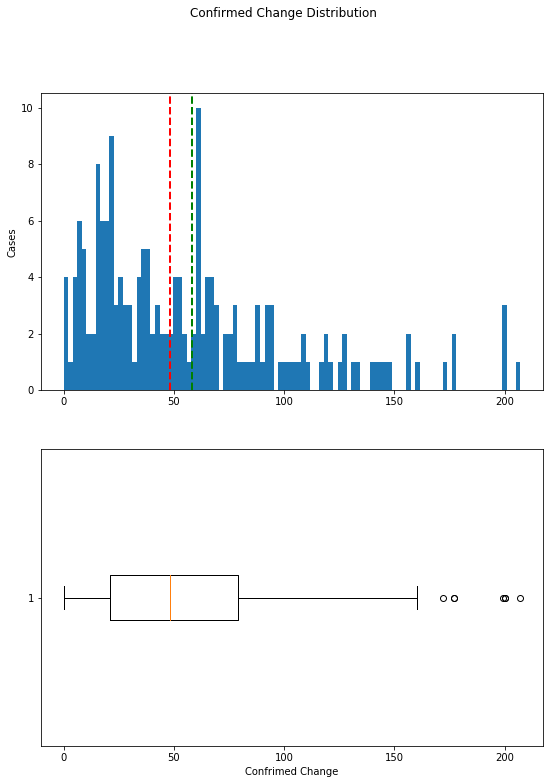

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = ChacoRawData['ConfirmedChange']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Cases')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='green', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='red', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Confrimed Change')

# Add a title to the Figure
fig.suptitle('Confirmed Change Distribution')

# Show the figure
fig.show()

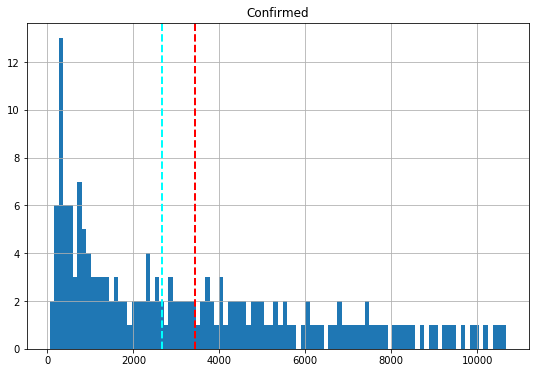

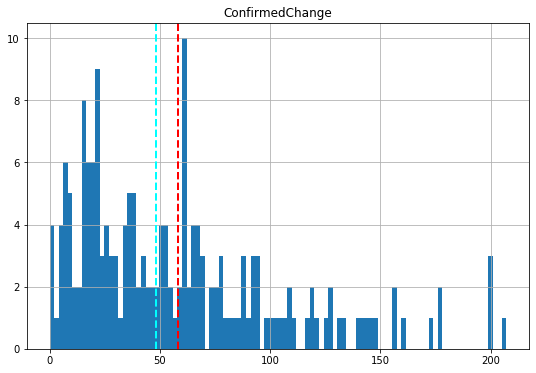

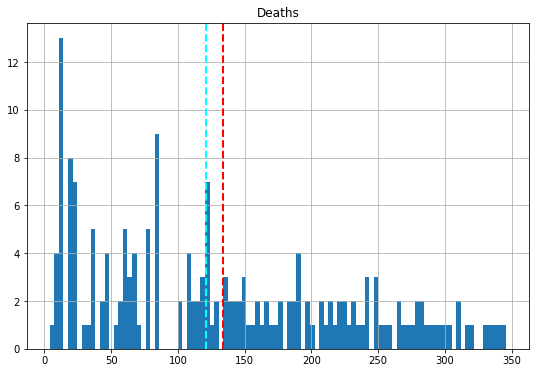

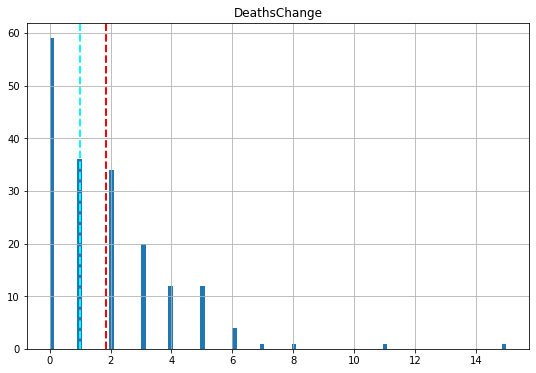

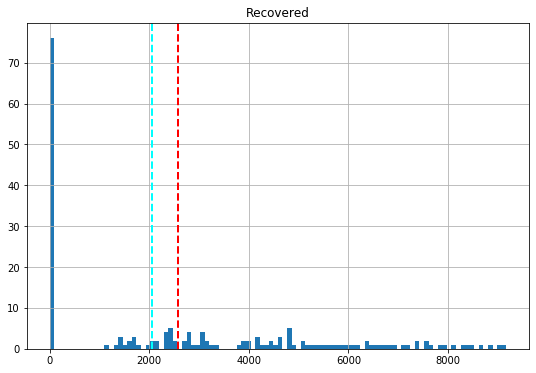

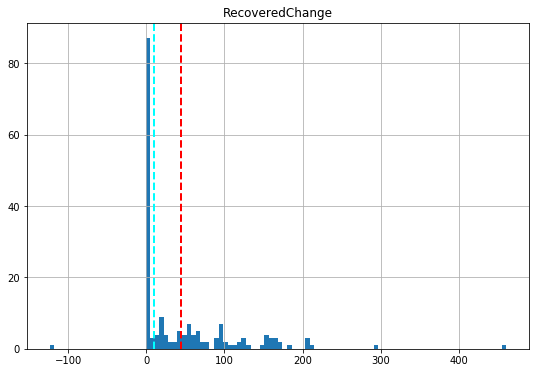

In [138]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = ChacoRawData[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

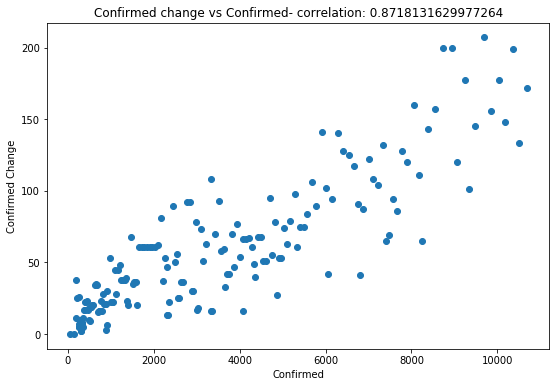

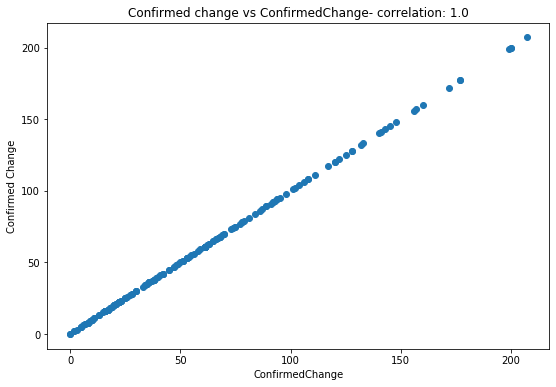

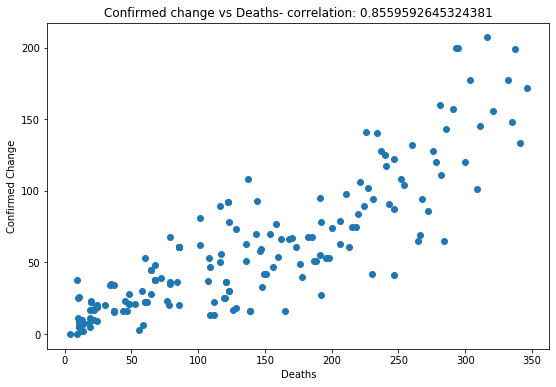

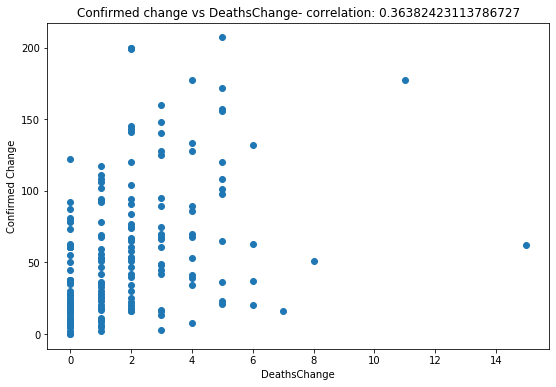

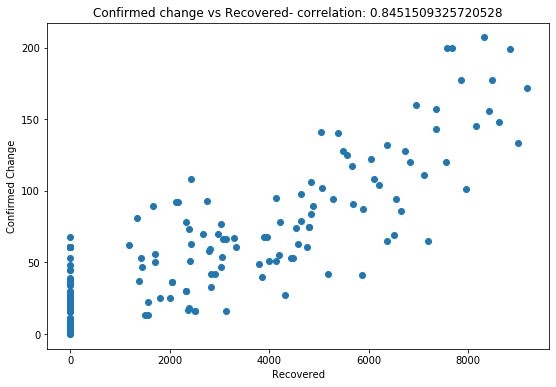

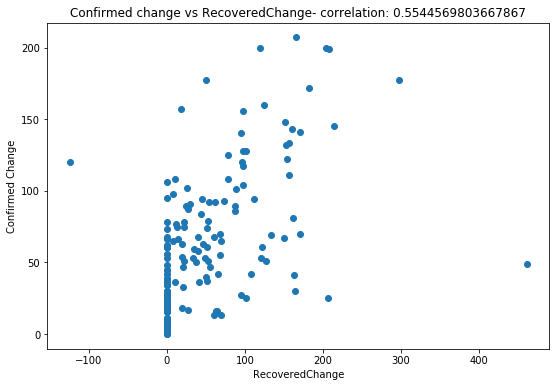

In [139]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = ChacoRawData[col]
    label = ChacoRawData['ConfirmedChange']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Confirmed Change')
    ax.set_title('Confirmed change vs ' + col + '- correlation: ' + str(correlation))
plt.show()


In [140]:
# Separate features and labels
X, y = ChacoRawData[['ConfirmedChange', 'RecoveredChange']].values, ChacoRawData['DeathsChange'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

#numeric_features = ['Confirmed','ConfirmedChange', 'Deaths', 'DeathsChange', 'Recovered', 'RecoveredChange']

Features:
[[ 0.  0.]
 [ 0.  0.]
 [38.  0.]
 [11.  0.]
 [25.  0.]
 [26.  0.]
 [ 5.  0.]
 [ 5.  0.]
 [ 7.  0.]
 [10.  0.]]

Labels:
[0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]


In [141]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

print ('Training Set: %d, rows\nTest Set: %d rows' % (X_train.size, X_test.size))

Training Set: 324, rows
Test Set: 38 rows


In [142]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression(normalize=False).fit(X_train, y_train)
print (model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [143]:
#Evaluate the train model

import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [1. 1. 1. 3. 2. 1. 2. 2. 3. 2.]
Actual labels   :  [ 0.  0.  4. 11.  2.  0.  3.  3.  3.  3.]


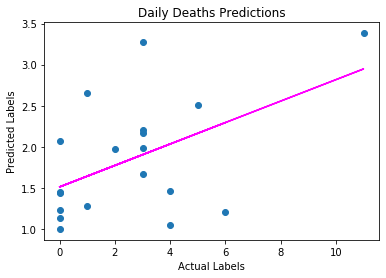

In [144]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Deaths Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

You can quantify the residuals by calculating a number of commonly used evaluation metrics. We'll focus on the following three:

- **Mean Square Error (MSE)**: The mean difference between predicted and actual, squared. This yields a relative metric in which the smaller the value, the better the fit of the model
- **Root Mean Square Error (RMSE)**: The square root of the MSE. This yields an absolute metric in the same unit as the label (in this case, numbers of deaths). The smaller the value, the better the model (in a simplistic sense, it represents the average number of deaths by which the predictions are wrong!)
- **Coefficient of Determination (usually known as *R-squared* or R<sup>2</sup>**: A relative metric in which the higher the value, the better the fit of the model. In essence, this metric represents how much of the variance between predicted and actual label values the model is able to explain.

In [145]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 6.41208674789204
RMSE: 2.5322098546313336
R2: 0.12119843736179725


In [146]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [0, 1]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0, 1]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression(normalize=False))])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [0, 1]),
                                                 ('cat',
                                                  Pipeline(memory=None,
 

Predicted labels:  [0. 0. 1. 4. 3. 0. 3. 2. 3. 3.]
Actual labels:  [ 0.  0.  4. 11.  2.  0.  3.  3.  3.  3.]
MSE: 7.229121385981013
RMSE: 2.6887025469510406
R2: 0.009220645277469575


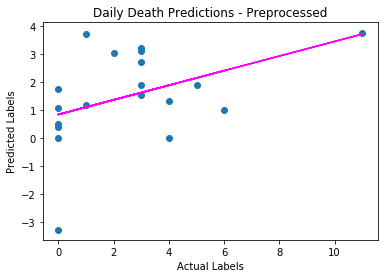

In [147]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels: ' ,y_test[:10])

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Death Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Try a Different Algorithm

The linear regression algorithm we used to train the model has some predictive capability, but there are many kinds of regression algorithm we could try, including:

- **Linear algorithms**: Not just the Linear Regression algorithm we used above (which is technically an *Ordinary Least Squares* algorithm), but other variants such as *Lasso* and *Ridge*.
- **Tree-based algorithms**: Algorithms that build a decision tree to reach a prediction
- **Ensemble algorithms**: Algorithms that combine the outputs of multiple base algorithms to improve generalizability.

Let's try training our regression model by using an ensemble algorithm called **Gradient Boosting**. We can do this by just changing the last step of the pipeline.

In [148]:
from sklearn.ensemble import GradientBoostingRegressor

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', GradientBoostingRegressor())])


# train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [0, 1]),
                                                 ('cat',
                                                  Pipeline(memory=None,
 

MSE: 7.1890036175680265
RMSE: 2.68123173514861
R2: 0.014718942315088412


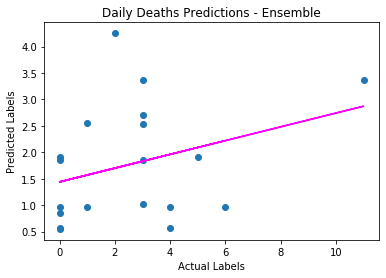

In [149]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Deaths Predictions - Ensemble')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [150]:
#Use the trained model
import joblib

# Save the model as a pickle file
filename = 'C:/Users/paulo/Documents/Paulo/Covid19_Data/DataFiles/models/Chaco_deaths_predictions.pkl'
joblib.dump(model, filename)

['C:/Users/paulo/Documents/Paulo/Covid19_Data/DataFiles/models/Chaco_deaths_predictions.pkl']

In [152]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[197,166]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} deaths'.format(np.round(result[0])))

New sample: [197.0, 166.0]
Prediction: 3 deaths
